# Trieste

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import os
from omegaconf import OmegaConf
from src.constants import CONFIG_PATH
from sithom.plot import plot_defaults

plot_defaults()

## Is tensorflow working?

In [3]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

2023-06-26 15:21:28.048053: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version: 2.11.1


In [4]:
cifar = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar.load_data()
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=(32, 32, 3),
    classes=100,
)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, batch_size=64)

169001437/169001437 [==============================] - 6s 0us/step


2023-06-26 15:21:51.015828: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
782/782 [==============================] - 327s 404ms/step - loss: 4.7188 - accuracy: 0.0731
Epoch 2/5
782/782 [==============================] - 306s 391ms/step - loss: 3.9733 - accuracy: 0.1382
Epoch 3/5
782/782 [==============================] - 311s 398ms/step - loss: 3.9230 - accuracy: 0.1572
Epoch 4/5
782/782 [==============================] - 314s 401ms/step - loss: 4.0844 - accuracy: 0.1509
Epoch 5/5
782/782 [==============================] - 309s 395ms/step - loss: 3.7438 - accuracy: 0.1733


In [5]:
model.evaluate(x_train, y_train, verbose=2)

1563/1563 - 84s - loss: 3.6462 - accuracy: 0.1802 - 84s/epoch - 54ms/step


[3.646155595779419, 0.18016000092029572]

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10),
    ]
)

2023-06-26 13:54:00.291513: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.73798996,  0.22071701,  0.02221102, -0.45886058,  0.56066203,
        -0.13482471, -0.3572015 ,  0.5459094 ,  0.91837835,  0.04039938]],
      dtype=float32)

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.03991444, 0.1041097 , 0.08536524, 0.05276602, 0.14626062,
        0.07295942, 0.05841231, 0.14411873, 0.20916145, 0.08693211]],
      dtype=float32)

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [10]:
loss_fn(y_train[:1], predictions).numpy()

2.617852

In [11]:
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

In [12]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3030 - accuracy: 0.9117
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1469 - accuracy: 0.9563
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1105 - accuracy: 0.9666
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0919 - accuracy: 0.9717
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0777 - accuracy: 0.9760


In [13]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0796 - accuracy: 0.9766 - 288ms/epoch - 920us/step


[0.07959438115358353, 0.9765999913215637]

In [14]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [15]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.2334969e-07, 2.5109698e-10, 3.2966866e-05, 4.8035403e-05,
        4.5576446e-12, 9.8782618e-07, 3.1706591e-14, 9.9990535e-01,
        1.1319307e-06, 1.1420937e-05],
       [4.4968279e-10, 3.6090656e-05, 9.9995553e-01, 5.9935701e-07,
        6.1455048e-15, 4.8618044e-06, 7.8038971e-07, 7.1551465e-15,
        1.9968757e-06, 6.1463170e-14],
       [4.5567287e-08, 9.9900275e-01, 3.4027611e-04, 2.5465529e-06,
        4.3112774e-05, 1.5258771e-05, 2.3079005e-05, 4.3566659e-04,
        1.3673786e-04, 5.4023110e-07],
       [9.9993801e-01, 2.3734875e-10, 9.2425662e-06, 1.9217261e-08,
        7.8068565e-09, 4.3139264e-07, 5.1303465e-05, 4.7506896e-07,
        1.4495763e-09, 5.2287498e-07],
       [2.3489240e-06, 4.8111615e-11, 4.9797050e-06, 1.6807194e-07,
        9.9884319e-01, 3.3102603e-07, 1.3200348e-07, 2.4360146e-05,
        4.9283381e-07, 1.1239263e-03]], dtype=float32)>

## Now try trieste

In [22]:
import trieste

print("Trieste version:", trieste.__version__)

Trieste version: 1.1.2


In [18]:
import numpy as np
import tensorflow as tf

np.random.seed(1793)
tf.random.set_seed(1793)

In [23]:
from trieste.objectives import ScaledBranin
from trieste.experimental.plotting import plot_function_plotly
from trieste.space import Box

In [26]:
from pandas import Series
from numpy.random import randn

In [24]:
scaled_branin = ScaledBranin.objective
search_space = ScaledBranin.search_space  # predefined search space
search_space = Box([0, 0], [1, 1])  # define the search space directly

In [32]:
from typing import Callable, Optional, Tuple
from trieste.types import TensorType
from trieste.utils import to_numpy
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def create_grid(
    mins: TensorType, maxs: TensorType, grid_density: int = 30
) -> Tuple[TensorType, TensorType, TensorType]:
    """
    Creates a regular 2D grid of size `grid_density^2` between mins and maxs.

    :param mins: list of 2 lower bounds
    :param maxs: list of 2 upper bounds
    :param grid_density: scalar
    :return: Xplot [grid_density**2, 2], xx, yy from meshgrid for the specific formatting of
        contour / surface plots
    """
    tf.debugging.assert_shapes([(mins, [2]), (maxs, [2])])

    xspaced = np.linspace(mins[0], maxs[0], grid_density)
    yspaced = np.linspace(mins[1], maxs[1], grid_density)
    xx, yy = np.meshgrid(xspaced, yspaced)
    Xplot = np.vstack((xx.flatten(), yy.flatten())).T

    return Xplot, xx, yy


def add_surface_plotly(
    xx: TensorType,
    yy: TensorType,
    f: TensorType,
    fig: go.Figure,
    alpha: float = 1.0,
    figrow: int = 1,
    figcol: int = 1,
) -> go.Figure:
    """
    Adds a surface to an existing plotly subfigure

    :param xx: [n, n] array (input)
    :param yy: [n, n] array (input)
    :param f: [n, n] array (output)
    :param fig: the current plotly figure
    :param alpha: transparency
    :param figrow: row index of the subfigure
    :param figcol: column index of the subfigure
    :return: updated plotly figure
    """

    z = f.reshape([xx.shape[0], yy.shape[1]])

    fig.add_trace(
        go.Surface(
            z=z, x=xx, y=yy, showscale=False, opacity=alpha, colorscale="viridis"
        ),
        row=figrow,
        col=figcol,
    )
    return fig


def plot_function_plotly(
    obj_func: Callable[[TensorType], TensorType],
    mins: TensorType,
    maxs: TensorType,
    grid_density: int = 20,
    title: Optional[str] = None,
    xlabel: Optional[str] = None,
    ylabel: Optional[str] = None,
    alpha: float = 1.0,
) -> go.Figure:
    """
    Plots 2-dimensional plot of an objective function. To illustrate the function we create a
    regular grid of points and evaluate the function on these points.

    :param obj_func: The vectorized objective function.
    :param mins: List of 2 lower bounds for creating a grid of points for model predictions.
    :param maxs: List of 2 upper bounds for creating a grid of points for model predictions.
    :param grid_density: Number of points per dimension. This will result in a grid size of
        grid_density^2.
    :param title: optional titles
    :param xlabel: optional xlabel
    :param ylabel: optional ylabel
    :param alpha: transparency
    :return: A plotly figure.
    """

    # Create a regular grid on the parameter space
    Xplot, xx, yy = create_grid(mins=mins, maxs=maxs, grid_density=grid_density)

    # Evaluate objective function
    F = to_numpy(obj_func(Xplot))
    if len(F.shape) == 1:
        F = F.reshape(-1, 1)
    n_output = F.shape[1]

    fig = make_subplots(
        rows=1,
        cols=n_output,
        specs=[[{"type": "surface"}] * n_output],
        subplot_titles=title,
    )

    for k in range(n_output):
        f = F[:, k]
        fig = add_surface_plotly(xx, yy, f, fig, alpha=alpha, figrow=1, figcol=k + 1)
        fig.update_xaxes(title_text=xlabel, row=1, col=k + 1)
        fig.update_yaxes(title_text=ylabel, row=1, col=k + 1)

    fig.update_layout(height=600, width=600)

    return fig

In [33]:
fig = plot_function_plotly(
    scaled_branin,
    search_space.lower,
    search_space.upper,
    grid_density=20,
)
fig.update_layout(height=400, width=400)
fig.show()

In [34]:
import trieste

observer = trieste.objectives.utils.mk_observer(scaled_branin)

num_initial_points = 5
initial_query_points = search_space.sample_sobol(num_initial_points)
initial_data = observer(initial_query_points)

In [35]:
import gpflow
import tensorflow_probability as tfp

from trieste.models.gpflow import GaussianProcessRegression


def build_model(data):
    variance = tf.math.reduce_variance(data.observations)
    kernel = gpflow.kernels.Matern52(variance=variance, lengthscales=[0.2, 0.2])
    prior_scale = tf.cast(1.0, dtype=tf.float64)
    kernel.variance.prior = tfp.distributions.LogNormal(
        tf.cast(-2.0, dtype=tf.float64), prior_scale
    )
    kernel.lengthscales.prior = tfp.distributions.LogNormal(
        tf.math.log(kernel.lengthscales), prior_scale
    )
    gpr = gpflow.models.GPR(data.astuple(), kernel, noise_variance=1e-5)
    gpflow.set_trainable(gpr.likelihood, False)

    return GaussianProcessRegression(gpr, num_kernel_samples=100)


model = build_model(initial_data)

In [36]:
from trieste.models.gpflow import build_gpr

gpflow_model = build_gpr(initial_data, search_space, likelihood_variance=1e-7)
model = GaussianProcessRegression(gpflow_model, num_kernel_samples=100)

In [37]:
bo = trieste.bayesian_optimizer.BayesianOptimizer(observer, search_space)

num_steps = 15
result = bo.optimize(num_steps, initial_data, model)
dataset = result.try_get_final_dataset()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-06-26 14:37:41.811168: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: cond/branch_executed/_9
2023-06-26 14:37:46.595386: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: cond/branch_executed/_9
2023-06-26 14:37:47.654636: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: cond/branch_executed/_9
2023-06-26 14:37:48.699605: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: cond/branch_executed/_9
2023-06-26 14:37:49.732118: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: cond/branch_executed/_9
2023-06-26 14:37:50.757089: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge

Optimization completed without errors


In [38]:
query_point, observation, arg_min_idx = result.try_get_optimal_point()

print(f"query point: {query_point}")
print(f"observation: {observation}")

query point: [0.54222754 0.15261285]
observation: [-1.04738654]


Text(0.5, 0, '$x_2$')

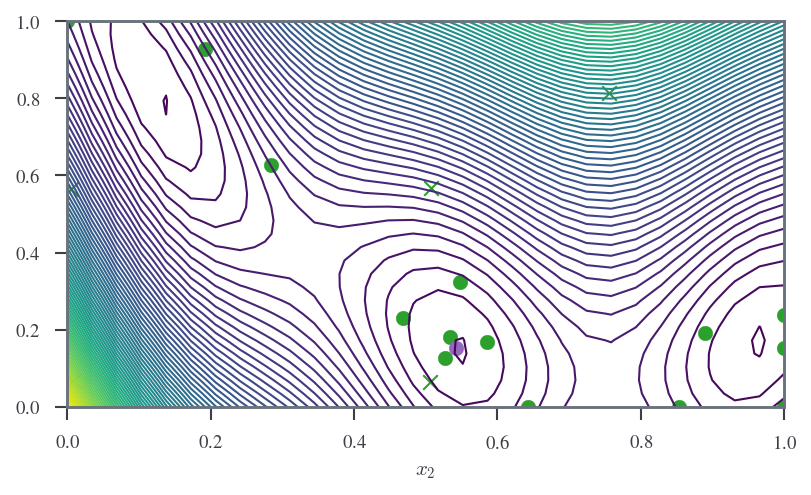

In [39]:
from trieste.experimental.plotting import plot_bo_points, plot_function_2d

query_points = dataset.query_points.numpy()
observations = dataset.observations.numpy()

_, ax = plot_function_2d(
    scaled_branin,
    search_space.lower,
    search_space.upper,
    grid_density=30,
    contour=True,
)
plot_bo_points(query_points, ax[0, 0], num_initial_points, arg_min_idx)
ax[0, 0].set_xlabel(r"$x_1$")
ax[0, 0].set_xlabel(r"$x_2$")

Text(0.5, 0, '# evaluations')

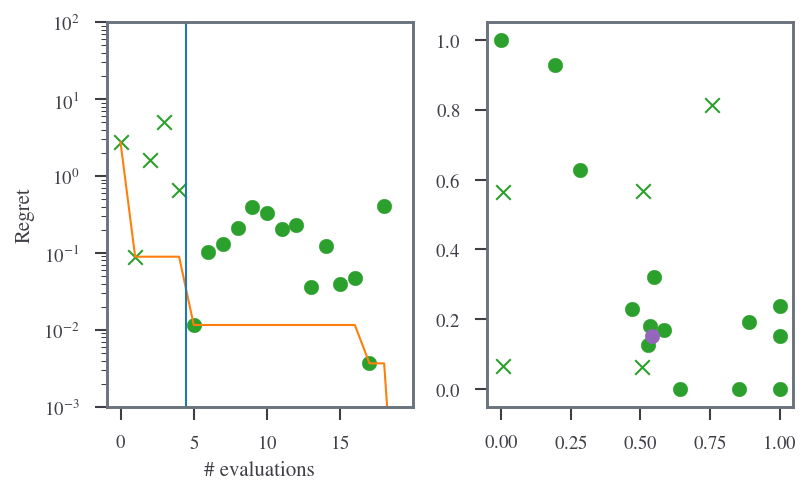

In [40]:
import matplotlib.pyplot as plt
from trieste.experimental.plotting import plot_regret

suboptimality = observations - ScaledBranin.minimum.numpy()
_, ax = plt.subplots(1, 2)
plot_regret(suboptimality, ax[0], num_init=num_initial_points, idx_best=arg_min_idx)
plot_bo_points(query_points, ax[1], num_init=num_initial_points, idx_best=arg_min_idx)

ax[0].set_yscale("log")
ax[0].set_ylabel("Regret")
ax[0].set_ylim(0.001, 100)
ax[0].set_xlabel("# evaluations")

╒═════════════════════════╤══════════════════╤══════════════════╤═══════════╤═════════════╤═══════════╤═════════╤═══════════════════════╕
│ name                    │ class            │ transform        │ prior     │ trainable   │ shape     │ dtype   │ value                 │
╞═════════════════════════╪══════════════════╪══════════════════╪═══════════╪═════════════╪═══════════╪═════════╪═══════════════════════╡
│ GPR.mean_function.c     │ Parameter        │ Identity         │           │ True        │ ()        │ float64 │ 1.41751               │
├─────────────────────────┼──────────────────┼──────────────────┼───────────┼─────────────┼───────────┼─────────┼───────────────────────┤
│ GPR.kernel.variance     │ Parameter        │ Softplus         │ LogNormal │ True        │ ()        │ float64 │ 3.55163               │
├─────────────────────────┼──────────────────┼──────────────────┼───────────┼─────────────┼───────────┼─────────┼───────────────────────┤
│ GPR.kernel.lengthscales │ Parame

Text(0.5, 0, '# Evaluations')

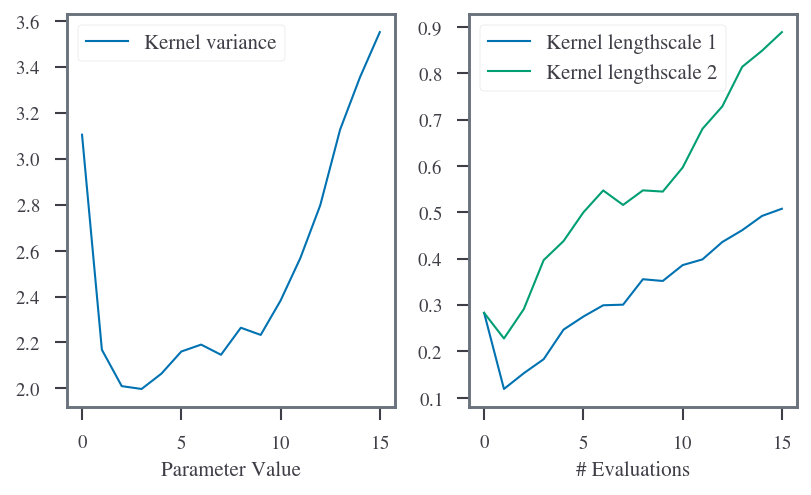

In [41]:
gpflow.utilities.print_summary(result.try_get_final_model().model)  # type: ignore

variance_list = [
    step.model.model.kernel.variance.numpy()  # type: ignore
    for step in result.history + [result.final_result.unwrap()]
]

ls_list = [
    step.model.model.kernel.lengthscales.numpy()  # type: ignore
    for step in result.history + [result.final_result.unwrap()]
]

variance = np.array(variance_list)
ls = np.array(ls_list)

fig, ax = plt.subplots(1, 2)
ax[0].plot(variance, label="Kernel variance")
ax[0].legend(loc="upper left")
ax[0].set_xlabel("# Evaluations")
ax[0].set_xlabel("Parameter Value")

ax[1].plot(ls[:, 0], label="Kernel lengthscale 1")
ax[1].plot(ls[:, 1], label="Kernel lengthscale 2")
ax[1].legend(loc="upper left")
ax[1].set_xlabel("# Evaluations")

2023-06-26 14:40:28.108136: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: cond/branch_executed/_9
2023-06-26 14:40:30.218273: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: cond/branch_executed/_9
2023-06-26 14:40:31.271918: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: cond/branch_executed/_9
2023-06-26 14:40:32.313359: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: cond/branch_executed/_9
2023-06-26 14:40:33.356121: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: cond/branch_executed/_9
2023-06-26 14:40:34.405674: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge

Optimization completed without errors


Text(0.5, 0, '$x_2$')

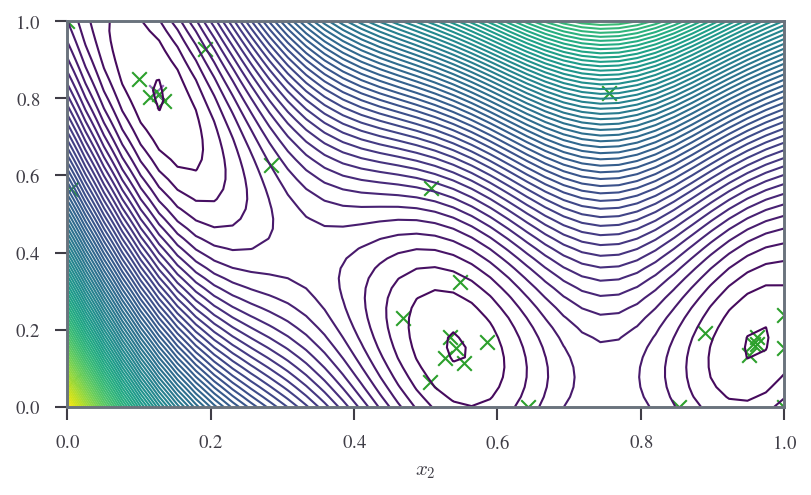

In [42]:
num_steps = 10
result = bo.optimize(
    num_steps, result.try_get_final_dataset(), result.try_get_final_model()
)
dataset = result.try_get_final_dataset()
_, _, arg_min_idx = result.try_get_optimal_point()

_, ax = plot_function_2d(
    scaled_branin,
    search_space.lower,
    search_space.upper,
    grid_density=40,
    contour=True,
)

plot_bo_points(
    dataset.query_points.numpy(),
    ax=ax[0, 0],
    num_init=len(dataset.query_points),
    idx_best=arg_min_idx,
)

ax[0, 0].set_xlabel(r"$x_1$")
ax[0, 0].set_xlabel(r"$x_2$")